In [2]:
#!pip install opencv-contrib-python

     |████████████████████████████████| 56.1 MB 7.6 kB/s eta 0:00:011     |███████████▎                    | 19.8 MB 12.1 MB/s eta 0:00:04     |███████████████████▎            | 33.8 MB 8.0 MB/s eta 0:00:03     |█████████████████████▋          | 37.9 MB 8.0 MB/s eta 0:00:03
You should consider upgrading via the '/home/tannu/zoro/bin/python3 -m pip install --upgrade pip' command.


In [4]:
#!pip install caer

     |████████████████████████████████| 838 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 22.8 MB 39 kB/s  eta 0:00:01     |██████████████████▍             | 13.1 MB 5.4 MB/s eta 0:00:02
You should consider upgrading via the '/home/tannu/zoro/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Reading and Displaying an Image

In [4]:
#using cv2
img= cv.imread('./Pictures/shiva.jpg')
cv.imshow('shiv', img)
cv.waitKey(0)
cv.destroyAllWindows()

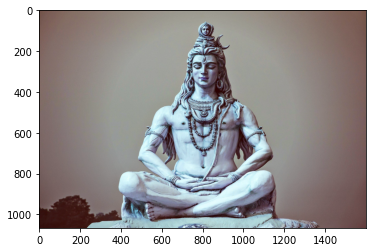

In [3]:
#using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

# Resize 


In [7]:
resize= cv.resize(img,(700,500))
cv.imshow('shiv', resize)
cv.waitKey(0)
cv.destroyAllWindows()

# Reading Videos

In [3]:
import cv2 as cv
capture= cv.VideoCapture('./Downloads/levi.mp4')
while True:
    isture, frame= capture.read()
    cv.imshow('levi', frame)
    if cv.waitKey(30)& 0xFF== ord('d'):
        break
capture.release()
cv.destroyAllWindows()

# Resize and Rescale (VIDEO)

In [15]:
#function to rescale and resize a video
def rescaleframe(frame, scale= 0.5):
    width= int(frame.shape[1]* scale)
    height= int(frame.shape[0]* scale)
    dimensions= (width, height)
    
    return cv.resize(frame, dimensions, interpolation= cv.INTER_AREA)

In [9]:
import cv2 as cv
capture= cv.VideoCapture('./Downloads/levi.mp4')

while True:
    isture, frame= capture.read()
    
    frame_resized= rescaleframe(frame)
    
    cv.imshow('levi', frame)
    cv.imshow('resized levi', frame_resized)
    
    if cv.waitKey(30)& 0xFF== ord('d'):
        break
capture.release()
cv.destroyAllWindows()

# Rescale and Resize (IMAGE)

In [16]:
img= cv.imread('./Pictures/shiva.jpg')
cv.imshow('SHIV', img)
resized_img= rescaleframe(img)
cv.imshow('shiv', resized_img)
cv.waitKey(0)
cv.destroyAllWindows()

# Draw shapes & write text on an Image

In [3]:
import cv2 as cv
import numpy as np

#creating a blank image
blank= np.zeros((500,500,3), dtype= 'uint8')
cv.imshow('Blank', blank)

# I'll be using blank image to draw for now, maybe I'll draw on ace(resized_img) also
#img= cv.imread('./Pictures/ace.jpg')
#cv.imshow('ACE', img)
#resized_img= cv.resize(img, (900,550), interpolation= cv.INTER_AREA)
#cv.imshow('R_Ace', resized_img)

# 1. Paint an Image with a color
blank[:]= 0,255,0       #paints the entire image with GREEN color
cv.imshow('Green', blank)

blank[:]= 0,0,255       #paints the entire image with RED color
cv.imshow('Red', blank)

blank[:]= 255,0,0       #paints the entire image with BLUE color
cv.imshow('Blue', blank)
#This is because the channels are in format BGR


cv.waitKey(0)
cv.destroyAllWindows()

In [18]:
#Painting a portion of an image with a certain color
blank= np.zeros((500,500,3), dtype= 'uint8')
blank[150:350, 225:275]= 255,0,0 #blank[y coordinate(width, xcoordinate(length)]= color channel(here it is Blue)
cv.imshow('Portion', blank)

# 2. Drawing a rectangle
rect= cv.rectangle(blank, (5,10), (495,490), (0,0,255), thickness= 3) # if instead of 2 in thickness we write cv.FILLED it will fill the color in that rectangle
#rect= cv.rectangle(blank,(0,0), (blank.shape[1]//2, blank.shape[0]//2), (0,0,255), thickness= 2)
cv.imshow('Rectangle', rect)


cv.waitKey(0)
cv.destroyAllWindows()


In [30]:
# 3. Drawing a circle
blank= np.zeros((500,500,3), dtype= 'uint8')
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 100, (0,0,255), thickness= -1) #if we provide thickness=-1 or cv,FILLED it will be filled with red color here
cv.imshow('circle', blank)

# 4. Drawing a line
cv.line(blank, (0,blank.shape[0]//2), (250,250), (255,255,255), thickness=3)
cv.imshow('line', blank)

# 5. write text
cv.putText(blank,'ONIGIRI',(175,225), cv.FONT_HERSHEY_TRIPLEX, 1.0,(255,255,255), 2)
cv.imshow('Text', blank)


cv.waitKey(0)
cv.destroyAllWindows()


# Basic Operations

In [13]:
# 1. converting image to Grayscale
img= cv.imread('./Pictures/zoom/eren.jpg')
gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('eren', img)
cv.imshow('gray', gray)

# 2. Blur an image (removes some of the noise), here I'm using Gaussian Blur.
blur= cv.GaussianBlur(img, (5,5), cv.BORDER_DEFAULT) # to increase the blur increase the kernel size
cv.imshow('blur', blur)

cv.waitKey(0)
cv.destroyAllWindows()

In [25]:
# 3. Edge cascade (using canny's method to detect edge)
canny= cv.Canny(img, (150), (200))
cv.imshow('canny', canny)
# if we want to reduce some edges, we can pass the blurry image 
blur_canny= cv.Canny(blur, (150), (200))
cv.imshow('blurcanny', blur_canny)


# 4. Dilating the Image
dilate= cv.dilate(canny, (3,3), iterations= 2)
#increase kernel size or iterations to increase the width of edges
cv.imshow('dialated', dilate)

# 5. Eroding an Image 
eroded= cv.erode(dilate, (3, 3), iterations= 2)
cv.imshow('eroded', eroded)

cv.waitKey(0)
cv.destroyAllWindows()

In [39]:
# Resize
resized= cv.resize(img, (650,500))
# the default interpolation is INTER_AREA, it should be used when the output image is smaller in size than the original image
# if you want to scale an Image to a larger dimension then INTER_LINEAR or INTER_CUBIC should be used.
# INTER_CUBIC is the slowest among them all but the output image is of much greater quality as compared to both INTER_LINEAR OR AREA
cv.imshow('resized', resized)


# Cropping
cropped= resized[65:440, 10:350] #cropped= resized[y1:y2,x1:x2]
cv.imshow('cropped', cropped)


cv.waitKey(0)
cv.destroyAllWindows()

# Image Transformations

In [11]:
ken= cv.imread('./Pictures/zoom/kaneki.jpg')
cv.imshow('kaneki', ken)

#Image Translation (Shifts the Image)

def translate(img, x, y):
    transMat= np.float32([[1,0,x], [0,1,y]])
    dim= (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dim)
# -x --> Left
# -y--> Up
#  x--> Right
#  y--> Down
translated= translate(ken, -75, 90)
cv.imshow('translated', translated)


cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
itachi= cv.imread('./Pictures/zoom/itachi.jpg')
cv.imshow('Itachi', itachi)

#Rotation

def rotate(img, angle, rotPoint= None): #rotPoint None means that the image will be rotated by centre 
    (height, width)= img.shape[:2]
    
    if rotPoint is None:
        rotPoint= (width//2, height//2)
    
    rotMat= cv.getRotationMatrix2D(rotPoint, angle, 1.0) # here 1.0 is scaling value,since we are not scaling its 1
    dim= (width, height)
    return cv.warpAffine(img, rotMat, dim)

rotated= rotate(itachi, 180) # +ve value for anti-clockwise rotation, -ve for clockwise rotation
cv.imshow('Rotated', rotated)


# Resizing

resized= cv.resize(rotated, (800,500), interpolation= cv.INTER_CUBIC)
cv.imshow('Resized', resized)



cv.waitKey(0)
cv.destroyAllWindows()

In [26]:
# Flipping
flip= cv.flip(ken, -1)  #here 1 is flip code, if the flip code is 1 the the image is flipped horizontically, if it's 0 then the image is flipped vertically and if it's -1 then image is flipped both vertically and horizontically
cv.imshow('Flipped', flip)


cv.waitKey(0)
cv.destroyAllWindows()

# Contour Detection

we can find conturs either by using edge cascading (eg= canny) or by binarizing the image using thresholding method

In [56]:
# reading and resizing image
img= cv.imread('./Pictures/zoom/meliodas.jpg')
cv.imshow('meliodas', img)

resized= cv.resize(img, (500,600), interpolation= cv.INTER_CUBIC)
cv.imshow('resized', resized)

#converting the image to grayscale
gray= cv.cvtColor(resized, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

#blurring image
blur= cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
cv.imshow('Blurred', blur)

#detecting edges using canny method
canny= cv.Canny(blur, 125, 175)
cv.imshow('canny', canny)

# thresholding image
# it is used to binarize the image by settig the threshold value
ret, threshold= cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
cv.imshow('Thresh', threshold)

# Contur Detection using findContours method
contour, hierarchies= cv.findContours(canny, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) #it takes edges as input and returns conturs and hierarchies
# we can either use canny edges or thresholded one
# mode in which we want to find the conturs = RETR_TREE if we want all the hierarchial contours,
# RETR_EXTERNAL if we want external contours
# RETR_LIST if we want all contours in the image
print(f'{len(contour)} contours found')

#to show the contours we find
blank= np.zeros(resized.shape, dtype= 'uint8')
cv.imshow('blank', blank)

cv.drawContours(blank, contour, -1, (0,0,255), 2)
# blank= image on which contours will be drawn, contour= the list of contours found, -1= all the contours, (0,0,255)= draw contours in red, 2= thickness
cv.imshow('contours', blank)



cv.waitKey(0)
cv.destroyAllWindows()

200 contours found


# Color Space


In [17]:
#reading an image
img= cv.imread('./Pictures/zoom/Hinata7.png')
cv.imshow('BGR', img)

#BGR to Grayscale
gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

#BGR to HSV (Hue Saturation Value)
hsv= cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('HSV', hsv)

#BGR to L*a*b
lab= cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('LAB', lab)

#BGR to RGB
rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('RGB', rgb)

#HSV to BGR
hsv_bgr= cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
cv.imshow('HSV2BGR', hsv_bgr)

#L*a*b to BGR
lab_bgr= cv.cvtColor(lab, cv.COLOR_LAB2BGR)
cv.imshow('LAB2BGR', lab_bgr)

#Grayscale to BGR
gray_bgr= cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
cv.imshow('Gray2BGR', gray_bgr)




cv.waitKey(0)
cv.destroyAllWindows()

In [33]:
#Reading and Resizing the image
img= cv.imread('./Pictures/zoom/hokage.jpg')
img= cv.resize(image, (600,600), interpolation= cv.INTER_CUBIC)
cv.imshow('dattebayo', img)

#Splitting the image into B,G,R respectively
b,g,r= cv.split(img)
cv.imshow('B', b)
cv.imshow('G', g)
cv.imshow('R', r)

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

#Merging the color channels
bgr= cv.merge([b,g,r])
cv.imshow('BGR', bgr)

#to see the respective color instead of grayscale images
blank= np.zeros(img.shape[:2], dtype= 'uint8')
blue= cv.merge([b, blank, blank])
cv.imshow('Blue', blue)
green= cv.merge([blank, g, blank])
cv.imshow('Green', green)
red= cv.merge([blank, blank, r])
cv.imshow('Red', red)




cv.waitKey(0)
cv.destroyAllWindows()

(600, 600, 3)
(600, 600)
(600, 600)
(600, 600)


# Blurring / Smoothing

In [59]:
img= cv.imread('./Pictures/zoom/download.jpeg')
cv.imshow('Normal', img)

#averaging 
avg= cv.blur(img, (5,5)) #increase the kernel size to increase the blur
cv.imshow('Average Blur', avg)

#gaussian blur
gauss= cv.GaussianBlur(img, (5,5), 0)
cv.imshow('Gaussian Blur', gauss)

#median blur
median= cv.medianBlur(img, 5) #in this, the kernel size isn't a tuple but an integer
cv.imshow('Median Blur', median)

#bilateral blur
bil= cv.bilateralFilter(img, 40, 65, 175) #40 is the diameter not the kernal size, 65 is the sigma color, 175 is sigma spacing
cv.imshow('Bilateral Blur', bil)






cv.waitKey(0)
cv.destroyAllWindows()

# Bitwise Operators

In [22]:
blank= np.zeros((400,400), dtype= 'uint8')
rect= cv.rectangle(blank.copy(), (30,30), (370,370), 255,-1) #(30,30) is the starting point of rectangle, (370,370) is the width & height of the rectangle, 255 is the color(white), -1 means fill the color
cv.imshow('Rectangle', rect)
circle= cv.circle(blank.copy(), (200,200), 200, 255, -1) #(200,200) is the centre of circle, 200 is the radius
cv.imshow('Circle', circle)

#bitwise AND (returns the intersection)
bit_and= cv.bitwise_and(rect, circle)
cv.imshow('Bitwise AND', bit_and)

#bitwise OR (returns the union)
bit_or= cv.bitwise_or(rect, circle)
cv.imshow('Bitwise OR', bit_or)

#bitwise XOR (returns non- intersecting regions)
bit_xor= cv.bitwise_xor(rect, circle)
cv.imshow('Bitwise XOR', bit_xor)

#bitwise NOT (inveverts binary color), takes only one Input
bit_not= cv.bitwise_not(circle)
cv.imshow('Bitwise NOT', bit_not)



cv.waitKey(0)
cv.destroyAllWindows()

# Masking

In [14]:
#reading and resizing image
image= cv.imread('./Pictures/zoom/Hinata7.png')
img= cv.resize(image, (800,600), interpolation= cv.INTER_CUBIC)
cv.imshow('Normal', img)

blank= np.zeros(img.shape[:2], dtype= 'uint8') #the dimensions of the mask has to be same size as that of the image
cv.imshow('Blank Image', blank)

mask= cv.circle(blank, (img.shape[1]//2, img.shape[0]//2 - 50),  200, 255, -1)
cv.imshow('Mask', mask)

masked= cv.bitwise_and(img, img, mask= mask)
cv.imshow('Masked', masked)





cv.waitKey(0)
cv.destroyAllWindows()

# Histogram Computation

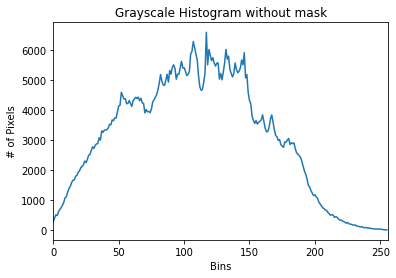

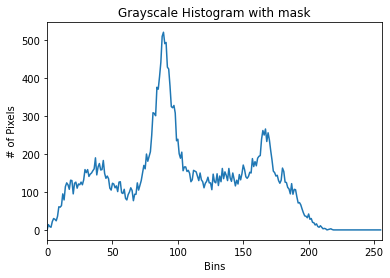

In [41]:
image= cv.imread('./Pictures/nature.jpeg')
img= cv.resize(image, (1080, 720), interpolation= cv.INTER_CUBIC)
cv.imshow('Image', img)

gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

#Grayscale Histogram(without mask)
gray_hist= cv.calcHist([gray], [0], None, [256], [0,256]) #[gray]= list of images we want histogram of, [0]= number of channels, None= mask, [256]= bins, [0,256]= range of all possible pixel values
plt.figure()
plt.title("Grayscale Histogram without mask")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()


#Grayscale Histogram(with mask)
blank= np.zeros(img.shape[:2], dtype= 'uint8')
circle= cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
mask= cv.bitwise_and(gray, gray, mask= circle)
cv.imshow('Masked', mask)

gray_hist= cv.calcHist([gray], [0], mask, [256], [0,256]) 
plt.figure()
plt.title("Grayscale Histogram with mask")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()










cv.waitKey(0)
cv.destroyAllWindows()


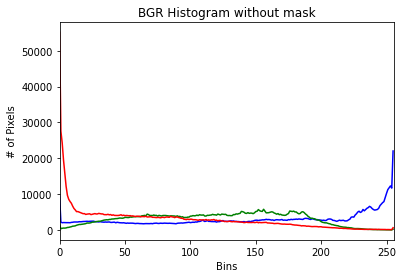

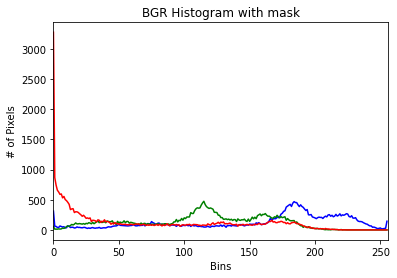

In [45]:
#Histogram for BGR image without mask
cv.imshow('BGR', img)
plt.figure()
plt.title("BGR Histogram without mask")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
colors= ('b', 'g', 'r')
for i, cols in enumerate(colors):
    bgr_hist= cv.calcHist([img], [i], None, [256], [0,256]) 
    plt.plot(bgr_hist, color= cols)
    plt.xlim([0,256])
plt.show()


#Histogram for BGR image with mask
blank= np.zeros(img.shape[:2], dtype= 'uint8')
mask= cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
masked= cv.bitwise_and(img, img, mask= mask)

cv.imshow('Masked', masked)
plt.figure()
plt.title("BGR Histogram with mask")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
colors= ('b', 'g', 'r')
for i, cols in enumerate(colors):
    bgr_hist= cv.calcHist([img], [i], mask, [256], [0,256]) 
    plt.plot(bgr_hist, color= cols)
    plt.xlim([0,256])
plt.show()




cv.waitKey(0)
cv.destroyAllWindows()


# Thresholding/Binarizing Images

In [21]:
img= cv.imread('./Pictures/cat.jpg')
cv.imshow('Cat', img)

gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# Simple Thresholding
threshold, thresh= cv.threshold(gray, 150, 255, cv.THRESH_BINARY) #thresh= returns the binarized image, threshold= the same value which we passed(here= 150)
  ##Higher the threshold value (here= 150), less part of the image will be white
cv.imshow('Simple Thresholded', thresh)

#Inverse Simple thresholding
threshold, thresh_inv= cv.threshold(gray, 125, 255, cv.THRESH_BINARY_INV)
cv.imshow('Inverse Threshold', thresh_inv)

#Adaptive thresholding
adp_thresh= cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 3) # 11= block/kernel size(here= (11,11)), we can use cv.ADAPTIVE_THRESH_GAUSSIAN_C instead of cv.ADAPTIVE_THRESH_MEAN_C, c= integer that is subtracted with mean to fine tune thresholding here c= 3
cv.imshow('Adaptive Thresholding', adp_thresh)

#Inverse Adaptive thresholding
adp_thresh_inv= cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 5, 7) # 11= block/kernel size(here= (11,11))
cv.imshow('Inverse Adaptive Thresholding', adp_thresh_inv)




cv.waitKey(0)
cv.destroyAllWindows()

# Edge Detection

In [18]:
image= cv.imread('./Pictures/zoom/luffy.jpg')
img= cv.resize(image, (450,660), interpolation= cv.INTER_CUBIC)
cv.imshow('Luffy', img)
gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

#Laplacian Edge Detection (laplacian method returns the gradients and it also consists negative value and since the images cannot have a negative value so we take the absolute value)
lap= cv.Laplacian(gray, cv.CV_64F) # cv.CV_64F is ddepth
lap= np.uint8(np.absolute(lap))
cv.imshow('Laplacian', lap)

# Sobel Edge Detection (it computes gradients in two directions (x & y))
sobelx=  cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely=  cv.Sobel(gray, cv.CV_64F, 0, 1)
cv.imshow('Sobel X', sobelx)
cv.imshow('Sobel Y', sobely)

combined_sobel= cv.bitwise_or(sobelx, sobely)
cv.imshow('Combined Sobel', combined_sobel)

#Canny method
canny= cv.Canny(gray, 150,175)
cv.imshow('Canny', canny)





cv.waitKey(0)
cv.destroyAllWindows()